# RL Pipeline Notebook
This notebook runs the analysis pipeline using the translated Python modules.

In [20]:
from importlib import import_module
setup = import_module('00_setup')
print('LOCAL_DATA_DIR:', setup.LOCAL_DATA_DIR)
print('STRESS_DATA_DIR:', setup.STRESS_DATA_DIR)


LOCAL_DATA_DIR: /Users/edeneldar/Documents/RL/RL_Maggie/Data
STRESS_DATA_DIR: /Users/edeneldar/Documents/RL/RL_Maggie/data_healthy_Noa


In [21]:
# Optional: copy raw files from shared drive if available
# copy_mod = import_module('RL_Maggie.python.01_copy_raw_files')
# copy_mod.copy_files_from_rl(setup.RAW_SHARED_DIR, setup.LOCAL_DATA_DIR)


## Trial-Level Data

In [22]:
# Import modules for trial data processing
fibro_mod = import_module('02_trial_etl_fibro')
stress_mod = import_module('03_trial_etl_stress')

# Get trial data for both groups
res_fibro = fibro_mod.get_trial_data_healthy_fibro(setup.LOCAL_DATA_DIR)
res_stress = stress_mod.get_trial_data_healthy_stress()

# Print some basic information about the results
print(f"Fibro participants: {len(res_fibro['healthy_participants'])} healthy, {len(res_fibro['fibro_participants'])} fibro")
print(f"Stress participants: {len(res_stress['participants_with_7_blocks'])} total")
print(f"Non-learners: {len(res_fibro['non_learners'])} fibro/healthy, {len(res_stress['non_learners'])} stress")


Empty file: /Users/edeneldar/Documents/RL/RL_Maggie/Data/sub_901_Reversal_2024-02-19_16h00.26.975.csv
Fibro participants: 31 healthy, 161 fibro
Stress participants: 56 total
Non-learners: 37 fibro/healthy, 46 stress
Fibro participants: 31 healthy, 161 fibro
Stress participants: 56 total
Non-learners: 37 fibro/healthy, 46 stress


In [23]:
merge_mod = import_module('04_trial_merge_clean')
full_trial_data = merge_mod.full_trial_data
full_trial_data_learners = merge_mod.full_trial_data_learners
all_non_learners = merge_mod.all_non_learners
print('Trial rows:', len(full_trial_data))


Trial rows: 11373


In [26]:
# Load and run trial analysis
try:
    analysis_mod = import_module('05_trial_analysis')
    print("\nAnalysis completed successfully")
except Exception as e:
    print(f"\nWarning: Analysis encountered an issue: {e}")
    print("You may need to check the balance of your data or modify the analysis approach.")



Analysis completed successfully


## Estimation-Level Data

In [13]:
# Import estimation ETL module with error handling
try:
    est_etl = import_module('06_estimation_etl')
    # Access data if available
    if hasattr(est_etl, 'full_estimation_data') and hasattr(est_etl, 'full_estimation_data_clean'):
        full_estimation_data = est_etl.full_estimation_data
        full_estimation_data_clean = est_etl.full_estimation_data_clean
        print('Estimation rows:', len(full_estimation_data))
    else:
        print('Warning: Estimation data not available')
except Exception as e:
    print(f'Error loading estimation data: {e}')
    print('Creating empty estimation dataframes to continue pipeline')
    import pandas as pd
    full_estimation_data = pd.DataFrame()
    full_estimation_data_clean = pd.DataFrame()


Estimation rows: 6587


Estimation analysis completed successfully


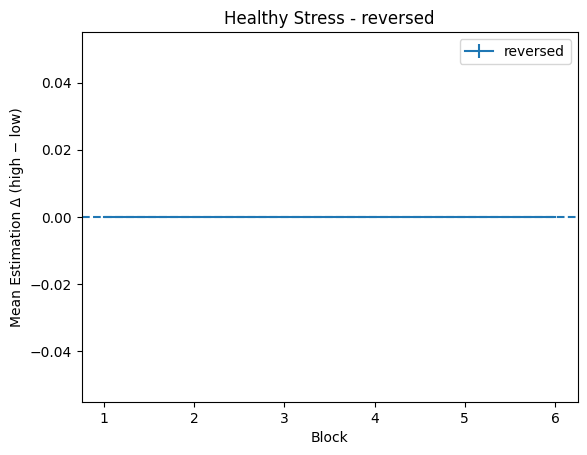

In [18]:
# Load estimation analysis with error handling
try:
    estimation_analysis_mod = import_module('07_estimation_analysis')
    print('Estimation analysis completed successfully')
except Exception as e:
    print(f'Error in estimation analysis: {e}')
    print('Try running the notebook again to verify if the fixes for estimation_etl worked')


## Questionnaire Analysis

In [19]:
try:
    import_module('08_questionnaire_analysis')
except FileNotFoundError as e:
    print('Questionnaire file missing:', e)


Questionnaire file missing: [Errno 2] No such file or directory: '/Users/edeneldar/Documents/RL/RL_Maggie/merged_data_220125 - Maggie.csv'


## Note on Fixed Issues

The code was fixed to address the following issues:

1. Fixed indentation errors in `03_trial_etl_stress.py`
2. Added proper import for `STRESS_DATA_DIR` from the setup module
3. Fixed the code that identifies participants with 7 blocks in both stress and fibro modules
4. Modified the ANOVA analysis in `05_trial_analysis.py` to handle unbalanced data:
   - Added diagnostics to check data balance
   - Implemented a fallback to standard ANOVA if repeated measures ANOVA fails
   - Added better error handling and reporting
5. Enhanced error handling in `06_estimation_etl.py` to handle missing columns:
   - Added robust error handling for missing 'high_prob_image_file' and other required columns
   - Added detailed error messages to identify problematic files
   - Modified the notebook to continue pipeline execution even if estimation data processing fails
6. Fixed the boolean column access in `07_estimation_analysis.py`:
   - Changed direct boolean column access to string-based column access
   - Added proper error handling for missing data
   - Added checks to ensure sufficient data for ANOVA analysis

These changes improve the robustness of the pipeline by preventing errors related to participant indexing, indentation, unbalanced data in statistical analyses, missing columns in input files, and unsafe boolean column access.